# 04 - Decision Trees

The goal of this exercise is to to develop an understanding how to implement a decision tree.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at the last week's notebooks.
    
It's also recommended to read the chapter 7 of the book in advance.
</div>

**Task**: In this exercise, we use a popular dataset to predict, if a patient has a heart disease or not, depending on some medical measurements.

In [1]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="color:blue" align="left">Load and preprocess data</h2>

In the first step, we need to load the dataset. If your are interessted about the meaning of each feature, you can have a look at the description on the [UCI site](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) to this dataset.

In [2]:
dataset = pd.read_csv('dataset/heart.dat', delim_whitespace=True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  target    270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


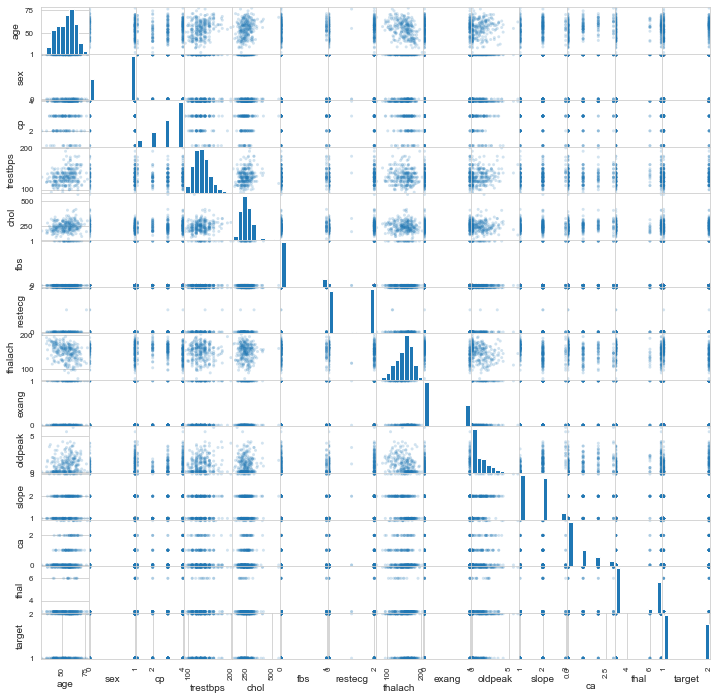

In [4]:
pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(12,12));

The dataset is complete and has only numerical values, we can do the train-test-split.

In [5]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=dataset['target'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

<div class="alert alert-block alert-info">
Decision trees and ensemble methods, like random forests, do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
</div>

<h2 style="color:blue" align="left">Build and evaluate the tree</h2>

Now, that we have prepared the data, we can start to grow the tree. Therefore we use the built-in class `DecisionTreeClassifier` of scikit-learn.

In [6]:
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create an instance of a DecisionTreeClassifer and save it in the variable tree_clf. Then fit the model using the training data set. Set the parameter random_state to 42, to have comparable results.
</div>

In [7]:
tree_clf = None
# Write Your Code Here
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

You can use the function defined below to visualize the full grown tree.

In [8]:
from sklearn import tree
def plot_decision_tree(dec_tree, feature_names, class_names, filename=None):
    # Setting dpi = 300 to make image clearer than default
    # fig size depends on the size of the tree
    depth = dec_tree.tree_.max_depth
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (depth*2,depth*2), dpi=300)
    tree.plot_tree(dec_tree,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
    if filename != None:
        fig.savefig(str(filename) + '.png')

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the function plot_decision_tree() to plot the tree you created in the previous task. If the output is too small, you can pass the function a filename as fourth parameter, to save the figure as png in the current directory.
</div>

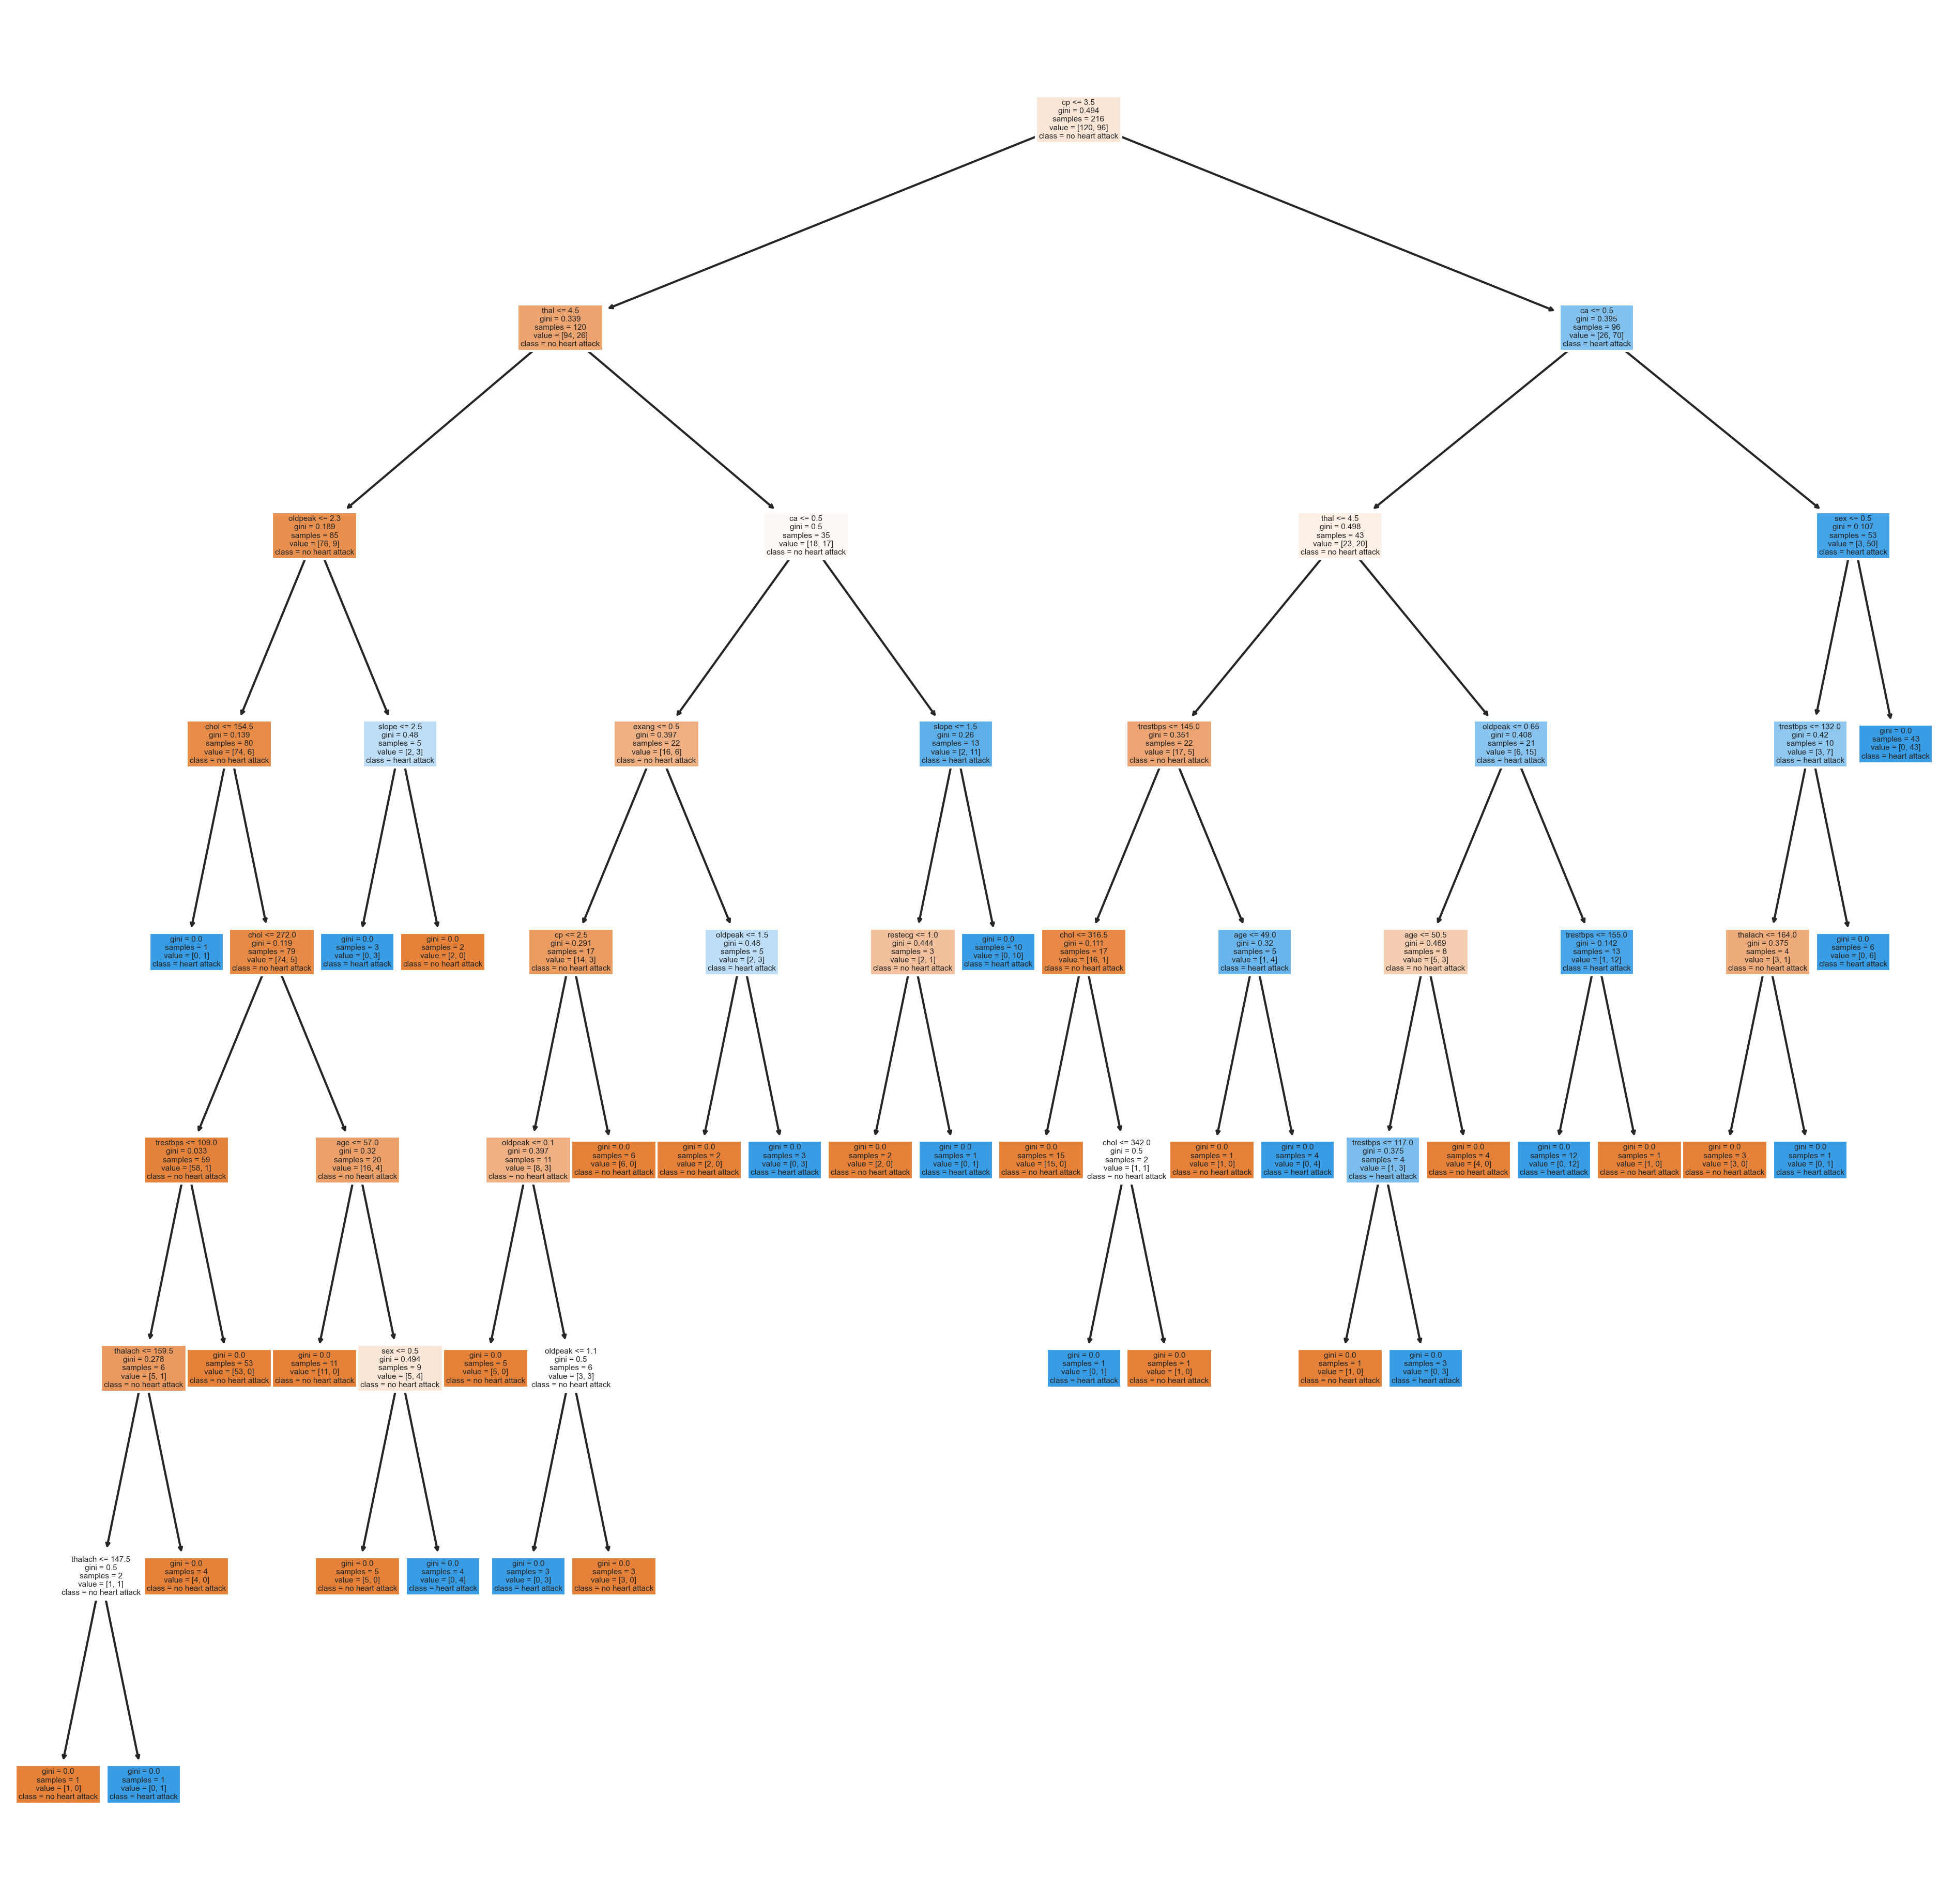

In [9]:
feature_names=X.columns
class_names=['no heart attack', 'heart attack']
# Write Your Code Here
plot_decision_tree(tree_clf, feature_names, class_names, 'tree-graph')

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the metrics Confusion Matrix and Accuracy score to evalute the performance of your model. Evaluate the model with the training and the test set. How do you assess the results?
</div>

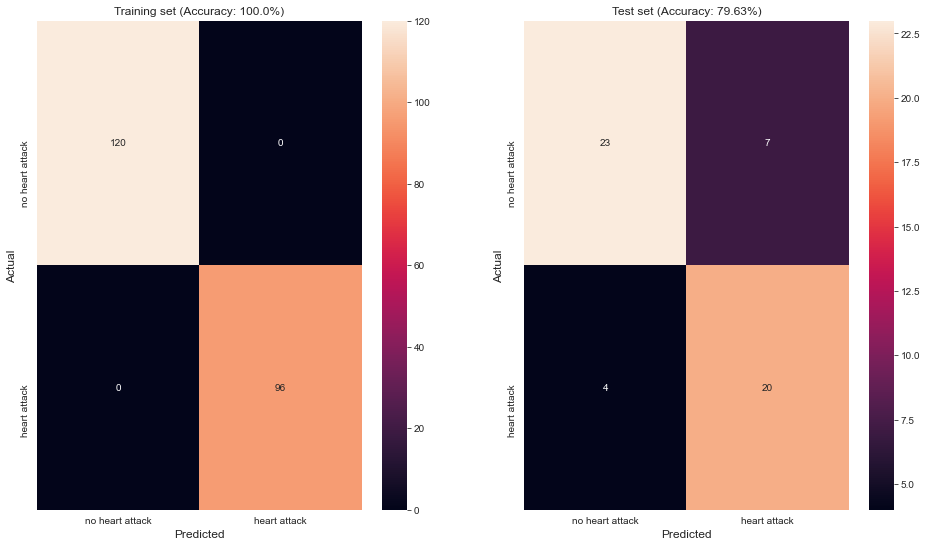

In [11]:
# Write Your Code Here

# Training Set
y_train_pred = tree_clf.predict(X_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
# Test Set
y_test_pred = tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# plot confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax1)
ax1.set_title(f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12);

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax2)
ax2.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12);

_Assess The Model Here_

The model is overfitted. Eventhough the accuracy of test set is reasonable for the initial run, 100% accuracy for training set is a strong indicator of overfit.

<h2 style="color:blue" align="left">Regularization</h2>

Especially if the model tends to overfitting, then the influence of max_depth and ccp_alpha should be examined.

### Max depth

Max_depth regulates the maximum depth of the tree.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use a for loop to create multiple trees with different depths. The values for max_depth to be examined are in the variable max_depths. Store the accuracy score of the training set and the test set in the variables provided. Then use the code in the next cell to visualize the results.
</div>

In [17]:
train_accuracies = []
test_accuracies = []
max_depths = range(1, tree_clf.tree_.max_depth+1)
# Write Your Code Here
for depth in max_depths:
    tree_clf_regularised = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf_regularised.fit(X_train, y_train)
    # Training set
    y_train_pred = tree_clf_regularised.predict(X_train)
    train_accuracies.append(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    # Test set
    y_test_pred = tree_clf_regularised.predict(X_test)
    test_accuracies.append(accuracy_score(y_pred=y_test_pred, y_true=y_test))

print('Train Accuracy:\t', train_accuracies)
print('Test Accuracy:\t', test_accuracies)

Train Accuracy:	 [0.7592592592592593, 0.7731481481481481, 0.8611111111111112, 0.9166666666666666, 0.9537037037037037, 0.9629629629629629, 0.9953703703703703, 1.0]
Test Accuracy:	 [0.7222222222222222, 0.7592592592592593, 0.8333333333333334, 0.7962962962962963, 0.7962962962962963, 0.7777777777777778, 0.7777777777777778, 0.7962962962962963]


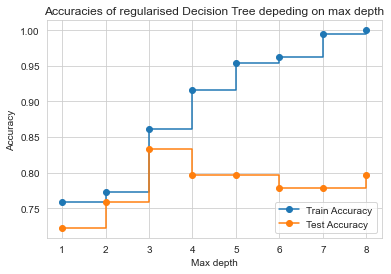

In [18]:
# Plot accuracies vs. max depth
plt.plot(max_depths, train_accuracies, marker='o', label='Train Accuracy', drawstyle='steps-post')
plt.plot(max_depths, test_accuracies, marker='o', label='Test Accuracy', drawstyle='steps-post')
plt.title('Accuracies of regularised Decision Tree depeding on max depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
#plt.ylim([0,1])
#plt.axhline(y=1, color='black', linestyle='-')
plt.legend(loc='lower right');

### Pruning

Another way to regularize a tree is the parameter ccp_alpha. With this parameter you can control the use of pruning. The higher the ccp_alpha value, the more batches will be pruned. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use a for loop to create multiple trees with different depths. The values for ccp_alpha to be examined are in the variable ccp_alphas. Store the accuracy score of the training set and the test set in the variables provided. Then use the code in the next cell to visualize the results.
</div>

In [23]:
train_accuracies = []
test_accuracies = []
ccp_alphas = np.linspace(0,0.1,11)
max_depths = range(1, tree_clf.tree_.max_depth+1)
# Write Your Code Here
for ccp_alpha in ccp_alphas:
    tree_clf_pruned = DecisionTreeClassifier(max_depth=3, ccp_alpha=ccp_alpha, random_state=42)
    tree_clf_pruned = tree_clf_pruned.fit(X_train, y_train)
    # Training set
    y_train_pred = tree_clf_pruned.predict(X_train)
    train_accuracies.append(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    # Test set
    y_test_pred = tree_clf_pruned.predict(X_test)
    test_accuracies.append(accuracy_score(y_pred=y_test_pred, y_true=y_test))

print('Train Accuracy:\t', train_accuracies)
print('')
print('Test Accuracy:\t', test_accuracies)

Train Accuracy:	 [0.8611111111111112, 0.8611111111111112, 0.8564814814814815, 0.7731481481481481, 0.7731481481481481, 0.7731481481481481, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593]

Test Accuracy:	 [0.8333333333333334, 0.8333333333333334, 0.8518518518518519, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]


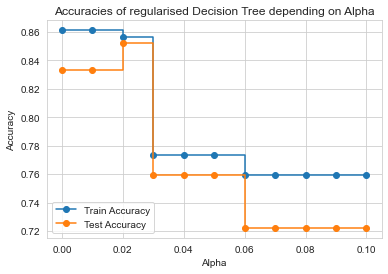

In [24]:
# Plot accuracies vs. Alpha
plt.plot(ccp_alphas, train_accuracies, marker='o', label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, marker='o', label="Test Accuracy", drawstyle="steps-post")
plt.title('Accuracies of regularised Decision Tree depending on Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
#plt.ylim([0,1])
plt.legend(loc='lower left');